# Convert Background Lighting Sketch to LED Coordinate List
loads the png. pixelart and makes it into a .csv with led coordinates and their background color

[  0 129 255]


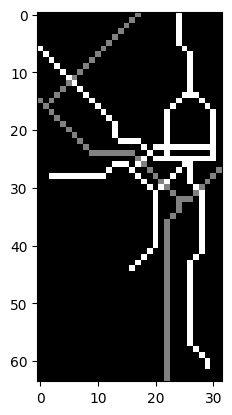

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
background_img = cv2.imread("background_lighting_sketch_v3.png", cv2.IMREAD_GRAYSCALE)


print(np.unique(background_img))

plt.imshow(background_img, cmap='gray')

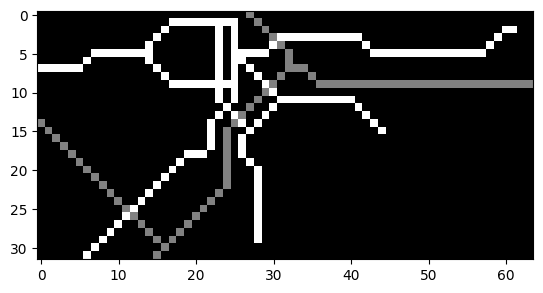

In [5]:
# needs to be rotated, as it is displayed on a display that is normally not hochkant 
background_img_rot = cv2.rotate(background_img, cv2.ROTATE_90_COUNTERCLOCKWISE)

plt.imshow(background_img_rot, cmap='gray')

In [6]:
# 0 = nichts
# 129 = DB
# 255 = RNV

# iterate over all pixels. If at pos xy there is 129, add the pixel xy with the DB color to the csv. If there is 255, add with RNV color.

import pandas as pd


DB_VALUE = 129
RNV_VALUE = 255

RNV_BACKGROUND_COLOR = '111111'
DB_BACKGROUND_COLOR = '333333'

background_lighting_rows = []


for y in range(background_img_rot.shape[0]):
    for x in range(background_img_rot.shape[1]):
        pixel = background_img_rot[y,x]
        
        if pixel == DB_VALUE:
            background_lighting_row = pd.DataFrame(data={'led': [f"{x}-{y}"], 'color': [DB_BACKGROUND_COLOR]})
            background_lighting_rows.append(background_lighting_row)
        
        if pixel == RNV_VALUE:
            background_lighting_row = pd.DataFrame(data={'led': [f"{x}-{y}"], 'color': [RNV_BACKGROUND_COLOR]})
            background_lighting_rows.append(background_lighting_row)
            
df_background_lighting = pd.concat(background_lighting_rows)

df_background_lighting.to_csv('background_lighting.csv', index=False)
        
            
